<a href="https://colab.research.google.com/github/merlindk/python-notebooks/blob/master/Linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
import numpy as np
import math
import matplotlib.pyplot as plt
import matplotlib.animation as animation

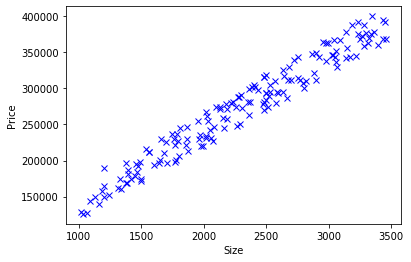

In [0]:
num_house = 160
np.random.seed(42)
house_size = np.random.randint(low=1000, high=3500, size=num_house)

np.random.seed(42)
house_price = house_size * 100.0 + np.random.randint(low=20000, high=70000, size=num_house)

plt.plot(house_size, house_price, "bx")
plt.ylabel("Price")
plt.xlabel("Size")
plt.show()


In [0]:
def normalize(array):
  return (array - array.mean()) / array.std()

num_train_samples = math.floor(num_house * 0.7)

train_house_size = np.asarray(house_size[:num_train_samples])
train_price = np.asarray(house_price[:num_train_samples])

train_house_size_norm = normalize(train_house_size)
train_price_norm = normalize(train_price)

test_house_size = np.array(house_size[num_train_samples:])
test_house_price = np.array(house_price[num_train_samples:])

test_house_size_norm = normalize(test_house_size)
test_house_price_norm = normalize(test_house_price)

In [0]:
tf_house_size = tf.placeholder("float", name="house_price")
tf_price = tf.placeholder("float", name="price")

tf_size_factor = tf.Variable(np.random.randn(), name="size_factor")
tf_price_offset = tf.Variable(np.random.randn(), name="price_offset")

In [0]:
tf_price_pred = tf.add(tf.multiply(tf_size_factor, tf_house_size), tf_price_offset)

tf_cost = tf.reduce_sum(tf.pow(tf_price_pred-tf_price, 2)) / (2*num_train_samples)

learning_rate = 0.1

optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(tf_cost)

init = tf.global_variables_initializer()

with tf.Session() as sess:
  sess.run(init)

  display_every = 2
  num_training_iter = 50
  for iteration in range(num_training_iter):

    for(x, y) in zip(train_house_size_norm, train_price_norm):
      sess.run(optimizer, feed_dict={tf_house_size: x, tf_price: y})

    if(iteration + 1) % display_every == 0:
      c = sess.run(tf_cost, feed_dict={tf_house_size: train_house_size_norm, tf_price:train_price_norm})
      print("iteration#:", '%04d' % (iteration + 1), "cost=", "{:.9f}".format(c),  "size_factor=", sess.run(tf_size_factor), "price_offset=", sess.run(tf_price_offset))

iteration#: 0002 cost= 0.720058978 size_factor= 0.09177997 price_offset= -0.78197587
iteration#: 0004 cost= 0.488989919 size_factor= 0.25305912 price_offset= -0.6400547
iteration#: 0006 cost= 0.334198892 size_factor= 0.38506958 price_offset= -0.52387947
iteration#: 0008 cost= 0.230510592 size_factor= 0.4931228 price_offset= -0.42877954
iteration#: 0010 cost= 0.161057383 size_factor= 0.5815667 price_offset= -0.35093102
iteration#: 0012 cost= 0.114538930 size_factor= 0.65396035 price_offset= -0.2872049
iteration#: 0014 cost= 0.083384469 size_factor= 0.713216 price_offset= -0.23503916
iteration#: 0016 cost= 0.062521778 size_factor= 0.76171756 price_offset= -0.19233663
iteration#: 0018 cost= 0.048552584 size_factor= 0.8014175 price_offset= -0.1573807
iteration#: 0020 cost= 0.039200630 size_factor= 0.8339127 price_offset= -0.1287661
iteration#: 0022 cost= 0.032940891 size_factor= 0.86051065 price_offset= -0.10534229
iteration#: 0024 cost= 0.028751854 size_factor= 0.882282 price_offset= -0.0